# Using NILMTK for Load Disaggregation

## Load Data and Print Dataset Statistics

### 1.1 Load UKDALE data into memory and print out the metadata

In [1]:
from nilmtk import DataSet
from nilmtk.utils import print_dict
from nilmtk.timeframe import TimeFrame
import pandas as pd

ukdale = DataSet(r"d:\research\nilm\data\ukdale\ukdale.h5")

### 1.2 Print out Metadata

In [2]:
print_dict(ukdale.metadata)

### Print out Buildings

In [3]:
print_dict(ukdale.buildings)

### 1.3 Print out the sub-metered appliances in each building

In [4]:
for build in ukdale.buildings:
    print("Appliances of Building " +str(build))
    print(ukdale.buildings[build].elec.submeters())
    print("---")

Appliances of Building 1
MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances=[Appliance(type='H

In [5]:
elec = ukdale.buildings[1].elec

### 1.4 Calculate the total energy consumption for building 1 in kWh

In [6]:
elec.mains().total_energy()

active      5008.108254
apparent    5835.953591
dtype: float64

### 1.5 Print out the type of power for mains and sub-meters

In [7]:
elec.mains().available_ac_types('power')

['active', 'apparent']

In [8]:
elec.submeters().available_ac_types('power')

['active', 'apparent']

# Data Training and Testing

In [9]:
import time
from six import iteritems
import matplotlib.pyplot as plt
import numpy as np
import os

train = DataSet(os.path.expanduser(r'd:\research\nilm\data\ukdale\ukdale.h5'))
from nilmtk.utils import print_dict
from nilmtk.timeframe import TimeFrame
import pandas as pd

#ukdale = DataSet('d:/research/nilm/data/ukdale/ukdale.h5')
test = DataSet(os.path.expanduser(r'd:\research\nilm\data\ukdale\ukdale.h5'))
from nilmtk.utils import print_dict
from nilmtk.timeframe import TimeFrame
import pandas as pd

#ukdale = DataSet('d:/research/nilm/data/ukdale/ukdale.h5')

In [18]:
train.set_window(end="24-3-2013")
test.set_window(start="25-3-2013")

train_elec = train.buildings[1].elec
test_elec = test.buildings[1].elec

C:\Users\Dr Anwaar\anaconda3\envs\nilmtk-env\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


<AxesSubplot:ylabel='Power (W)'>

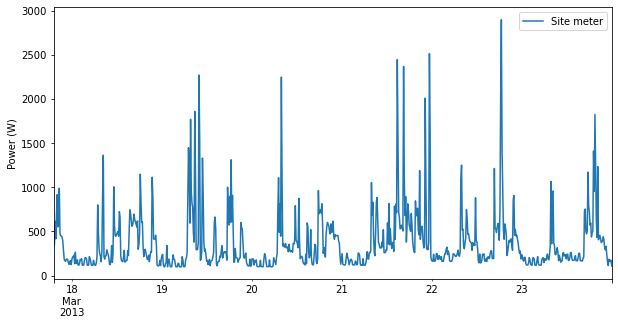

In [19]:
plt.rcParams['figure.figsize'] = [10, 5]
train_elec.mains().plot()

C:\Users\Dr Anwaar\anaconda3\envs\nilmtk-env\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


<AxesSubplot:ylabel='Power (W)'>

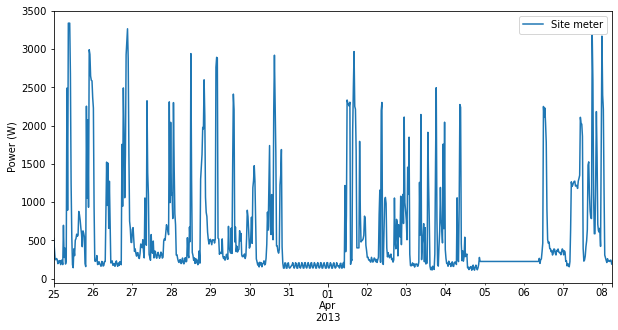

In [12]:
plt.rcParams['figure.figsize'] = [10, 5]
test_elec.mains().plot()

# Check Appliance Level Consumption

### Timeframed "Fridge Freezer" and "Light" Power Plot

In [20]:
#ukdale_window = DataSet('from nilmtk import DataSet')
from nilmtk.utils import print_dict
from nilmtk.timeframe import TimeFrame
import pandas as pd

ukdale = DataSet(r'd:\research\nilm\data\ukdale\ukdale.h5')
ukdale.set_window(start='2014-04-28', end='2014-04-29')

fridge_meter = ukdale.buildings[1].elec['fridge freezer']
light_meter = ukdale.buildings[1].elec['light']
elec = ukdale.buildings[1].elec

C:\Users\Dr Anwaar\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:187: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  ' returning the first appliance in the list.', RuntimeWarning)


<AxesSubplot:ylabel='Power (W)'>

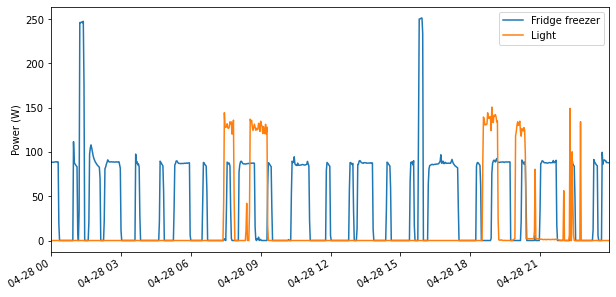

In [21]:
plt.rcParams['figure.figsize'] = [10, 5]
fridge_meter.plot()
light_meter.plot()

### Plot Overall Consumption For that time period

In [22]:
all_window = next(ukdale.buildings[1].elec.load())
all_window.head()

Loading data for meter ElecMeterID(instance=54, building=1, dataset='UK-DALE')     ElecMeterID(instance=52, building=1, dataset='UK-DALE')     
Done loading data all meters for this chunk.


physical_quantity,power,voltage,power
type,active,,apparent
2014-04-28 00:00:00+01:00,205.811661,241.641663,241.136673
2014-04-28 00:00:06+01:00,322.369995,241.383331,241.174988
2014-04-28 00:00:12+01:00,321.598328,241.540009,241.313324
2014-04-28 00:00:18+01:00,322.711670,241.638336,241.561661
2014-04-28 00:00:24+01:00,322.493347,241.651672,241.115005


<AxesSubplot:>

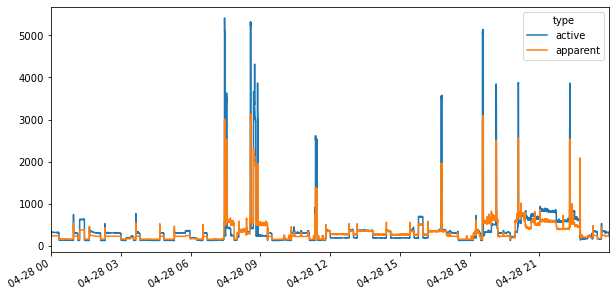

In [23]:
plt.rcParams['figure.figsize'] = [10, 5]
all_window['power'].plot()

### Calculate and plot the energy consumption fraction for each sub-meter

In [26]:
# Calculate and plot the energy consumption fraction for each sub-meter
#plt.figure(figsize = (12,14))
#wedgeprops = {"linewidth": 4, 'width':1, "edgecolor":"k"} # Width = 1
ukdale.buildings[1].elec.submeters().fraction_per_meter().fillna(0).plot(kind='pie')

3/52 ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])

AttributeError: 'UnImplemented' object has no attribute 'description'

### Find appliances of the type “single-phase induction motor”

In [ ]:
# Find appliances of the type “single-phase induction motor”
ukdale.buildings[1].elec.select_using_appliances(category=['single-phase induction motor'])

### Highest Power Consuming Appliances

In [ ]:
# Print out 3 appliances with the highest power consumption
plt.rcParams['figure.figsize'] = [10, 5]
ukdale.buildings[1].elec.submeters().select_top_k(k=3).plot()